In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/train '
test_dir = '/content/drive/MyDrive/test'

In [5]:
import os
print(len(os.listdir('/content/drive/MyDrive/train /penguins')))
print(len(os.listdir('/content/drive/MyDrive/train /turtles')))
print(len(os.listdir('/content/drive/MyDrive/test/penguins')))
print(len(os.listdir('/content/drive/MyDrive/test/turtles')))

550
557
200
200


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 886 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
28/28 [==============================] - 473s 17s/step - loss: 0.8912 - accuracy: 0.5451 - val_loss: 0.6391 - val_accuracy: 0.6516
Epoch 2/30
28/28 [==============================] - 249s 9s/step - loss: 0.5662 - accuracy: 0.7178 - val_loss: 0.5084 - val_accuracy: 0.7557
Epoch 3/30
28/28 [==============================] - 271s 10s/step - loss: 0.3955 - accuracy: 0.8318 - val_loss: 0.4658 - val_accuracy: 0.7692
Epoch 4/30
28/28 [==============================] - 253s 9s/step - loss: 0.3014 - accuracy: 0.8826 - val_loss: 0.6208 - val_accuracy: 0.7421
Epoch 5/30
28/28 [==============================] - 245s 9s/step - loss: 0.2189 - accuracy: 0.9165 - val_loss: 0.4917 - val_accuracy: 0.8281
Epoch 6/30
28/28 [==============================] - 243s 9s/step - loss: 0.1314 - accuracy: 0.9492 - val_loss: 0.6333 - val_accuracy: 0.8190
Epoch 7/30
28/28 [==============================] - 256s 9s/step - loss: 0.0860 - accuracy: 0.9718 - val_loss: 0.9390 - val_accuracy: 0.8009
Epoch 8/30


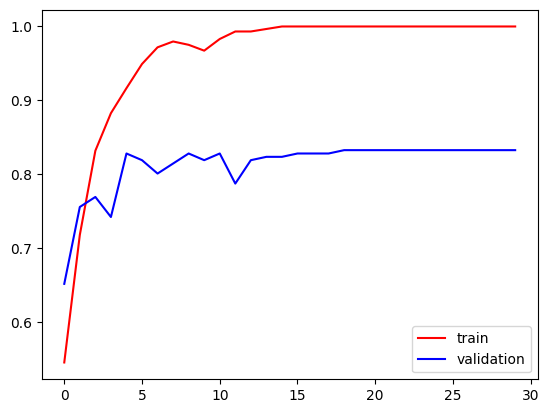

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

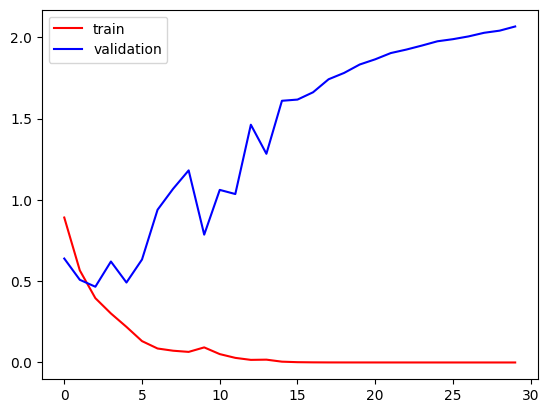

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'

)

Found 399 images belonging to 2 classes.


In [15]:
predictions = model.predict(test_data)
print(predictions)

13/13 [==============================] - 140s 11s/step
[[4.71790533e-15]
 [9.99868035e-01]
 [2.20519936e-10]
 [3.40724865e-10]
 [2.29224878e-36]
 [2.97902077e-02]
 [9.99752700e-01]
 [8.15509167e-03]
 [1.00000000e+00]
 [9.99955654e-01]
 [1.57171787e-08]
 [5.37605911e-06]
 [9.95591760e-01]
 [4.62792229e-07]
 [3.24104447e-04]
 [2.00665244e-12]
 [9.99963462e-01]
 [3.88925306e-19]
 [2.06148215e-02]
 [9.99999285e-01]
 [1.19055672e-08]
 [4.25033519e-09]
 [9.99972403e-01]
 [1.29923322e-07]
 [5.61276019e-01]
 [4.17105184e-04]
 [9.54827964e-01]
 [9.51238871e-13]
 [2.06102790e-24]
 [9.75204170e-01]
 [2.01804427e-31]
 [2.10082927e-03]
 [2.78240941e-06]
 [1.00000000e+00]
 [6.48377303e-19]
 [9.02859476e-09]
 [9.99455094e-01]
 [1.00000000e+00]
 [9.28441768e-09]
 [9.99999940e-01]
 [2.25038210e-15]
 [4.12189217e-13]
 [2.14347173e-03]
 [9.99009669e-01]
 [9.99999464e-01]
 [1.07064967e-04]
 [5.28065962e-15]
 [2.03591152e-18]
 [1.00000000e+00]
 [9.99971807e-01]
 [9.99288738e-01]
 [8.81583661e-19]
 [4.30050

In [16]:
len(predictions)

399

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 96 103]
 [ 93 107]]
classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       199
           1       0.51      0.54      0.52       200

    accuracy                           0.51       399
   macro avg       0.51      0.51      0.51       399
weighted avg       0.51      0.51      0.51       399

